In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**Importing Dataset**

In [95]:
import pandas as pd

# Load datasets
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

train.head() #preview first 5 rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Understanding the Dataset**

In [96]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Data Cleaning**

In [99]:
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing > 0].head(20)  # show top 20 columns with missing data


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [100]:
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
            'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    train[col] = train[col].fillna('None')

for col in ['GarageYrBlt', 'GarageCars', 'GarageArea', 'MasVnrArea']:
    train[col] = train[col].fillna(0)

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

for col in ['Electrical']:
    train[col] = train[col].fillna(train[col].mode()[0])
    
# Show all columns in output #None means no limit
pd.set_option('display.max_rows', None)
print(train.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [101]:
print(train.shape)          # rows × columns
print(train.dtypes.value_counts())  # how many numerical vs categorical
print(train.describe())     # summary stats for numerical columns

(1460, 81)
object     43
int64      35
float64     3
Name: count, dtype: int64
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
std     421.610009    42.300571    22.027677    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...

**Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


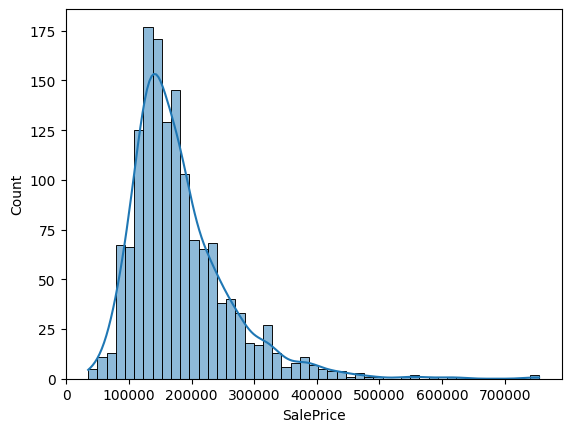

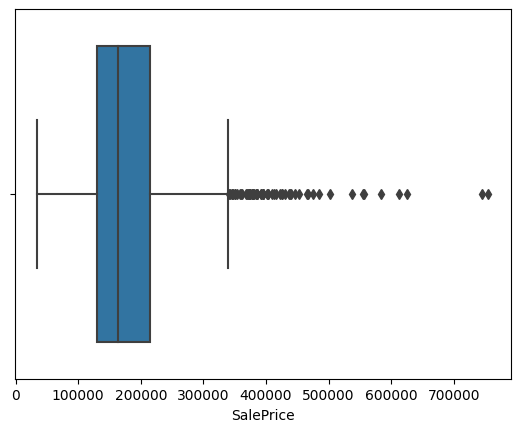

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.show()

sns.boxplot(x=train['SalePrice'])
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


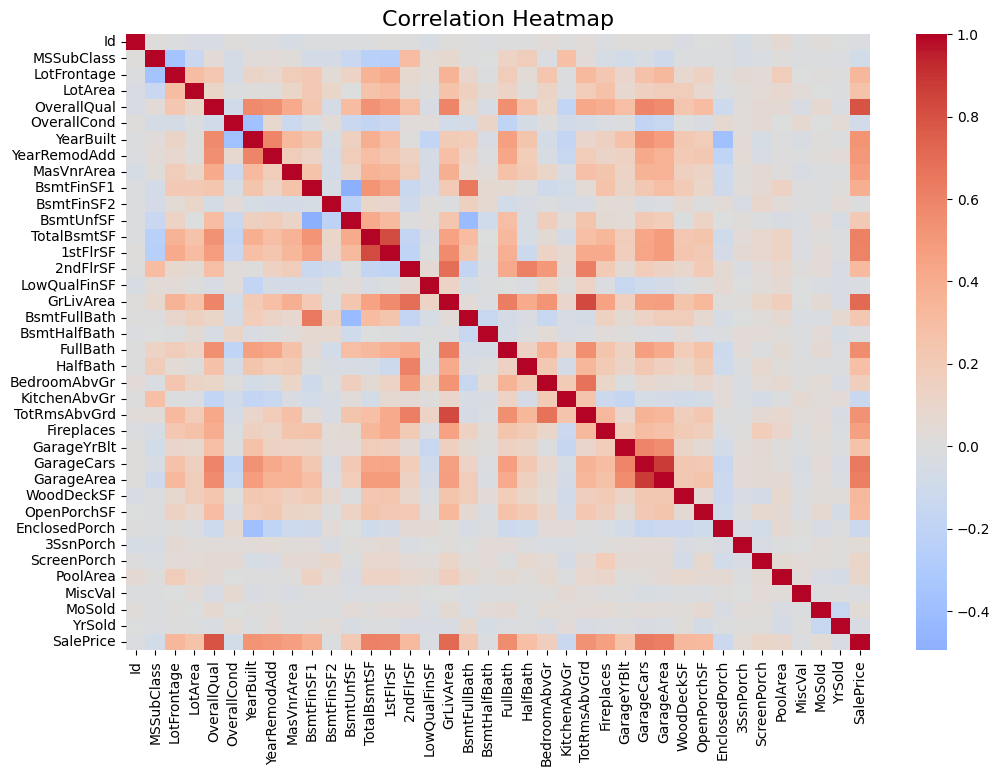

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [103]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
heatmap.set_title("Correlation Heatmap", fontsize=16)
plt.show()

# Top correlated features
corr['SalePrice'].sort_values(ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


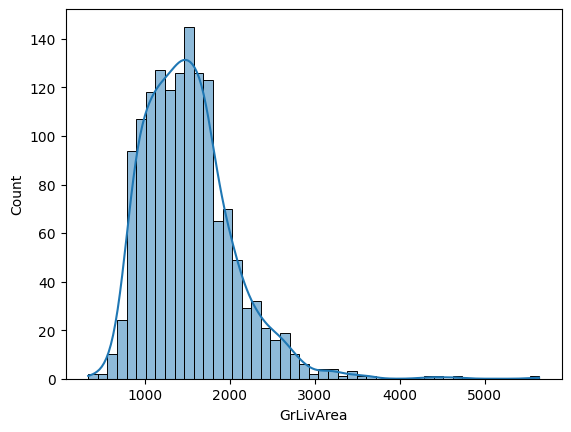

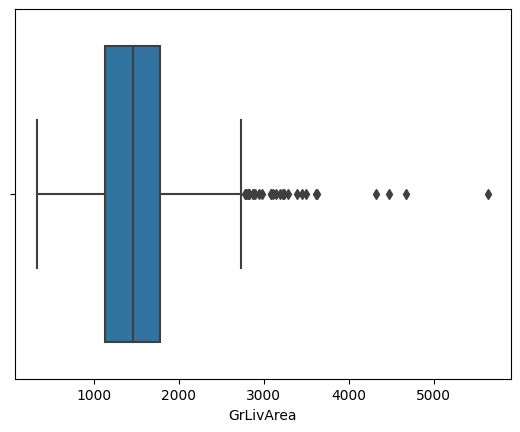

In [104]:
sns.histplot(train['GrLivArea'], kde=True)
plt.show()

sns.boxplot(x=train['GrLivArea'])
plt.show()


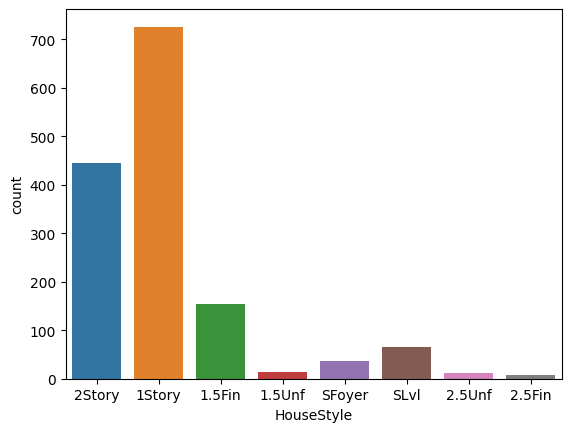

In [105]:
sns.countplot(x=train['HouseStyle'])
plt.show()


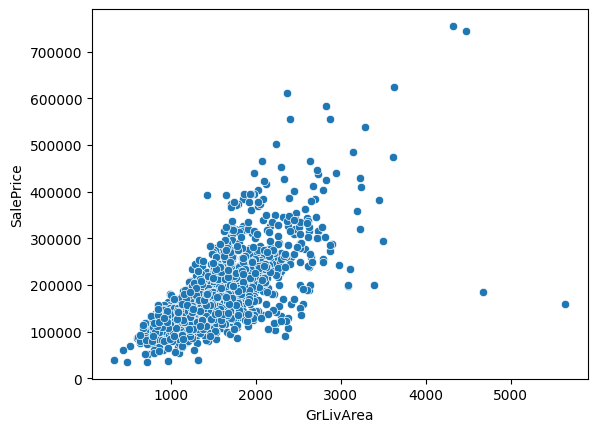

In [106]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()


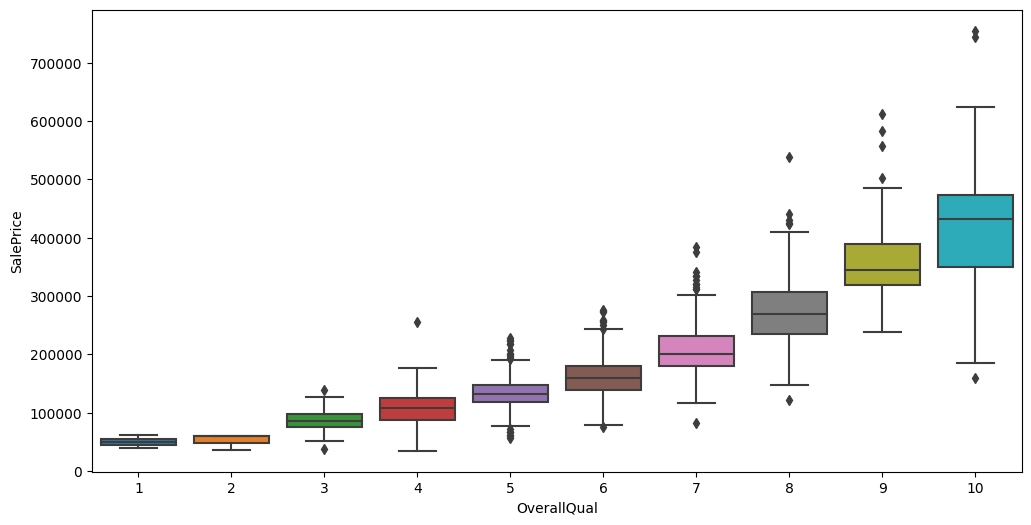

In [107]:
plt.figure(figsize=(12,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.show()


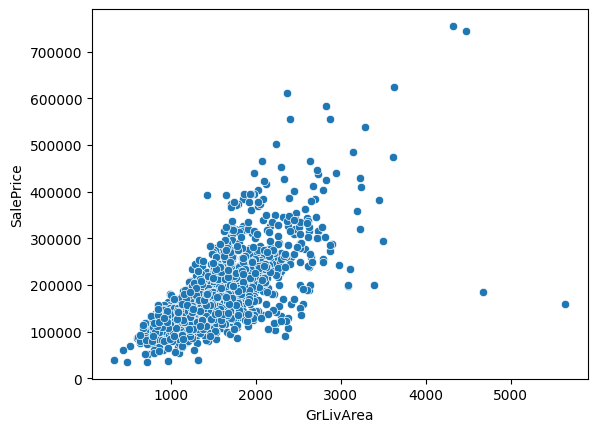

In [108]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

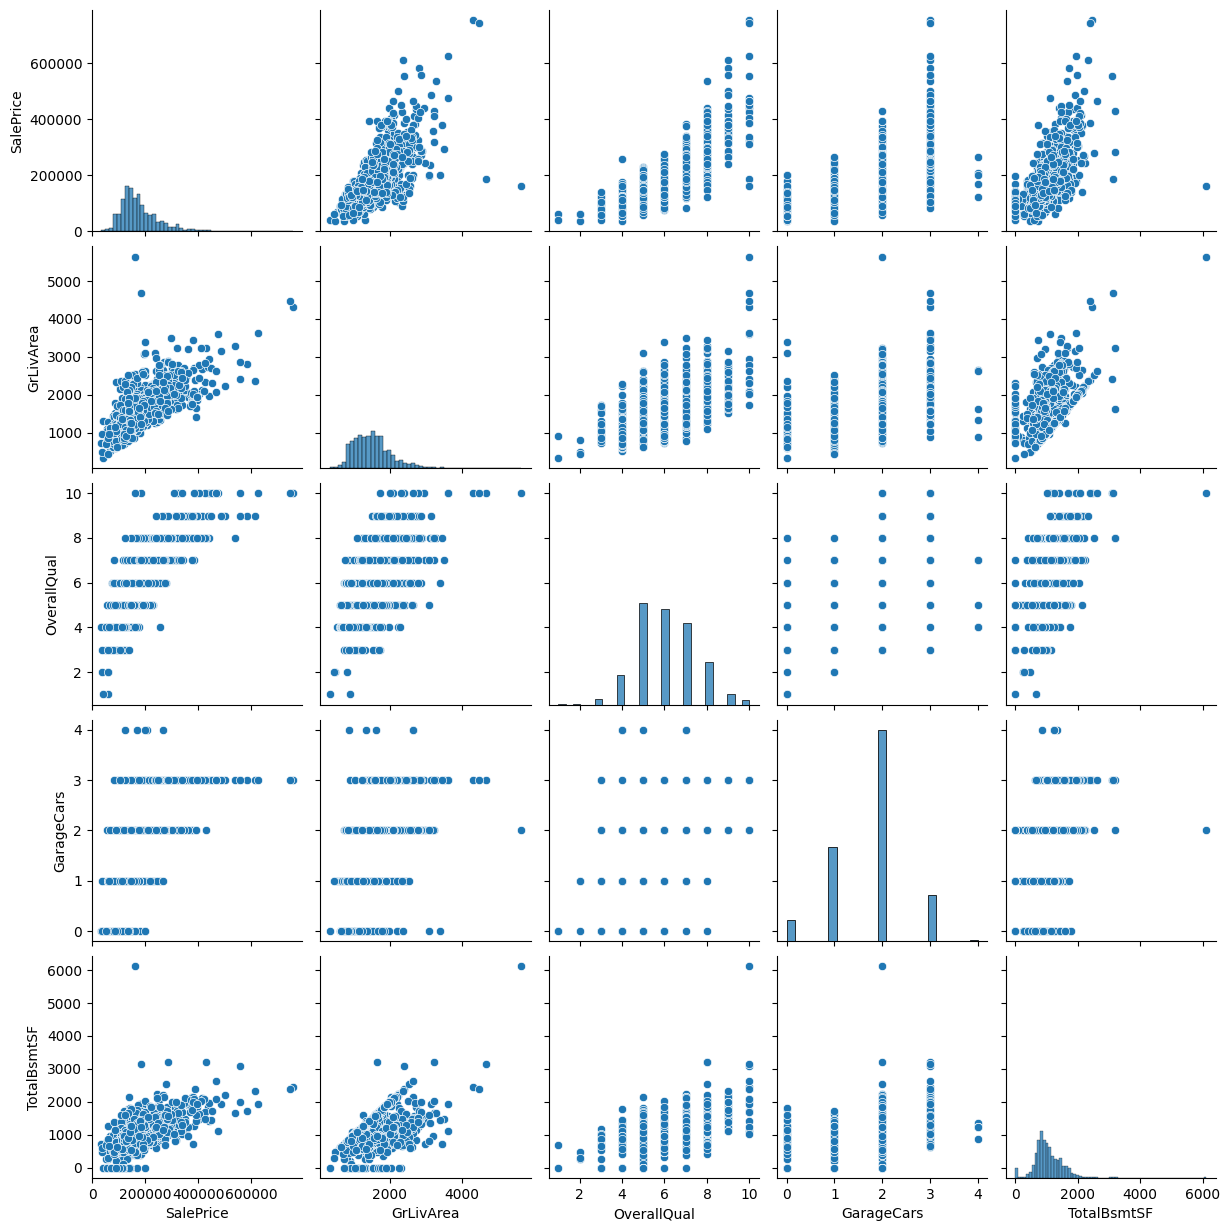

In [109]:
sns.pairplot(train[['SalePrice','GrLivArea','OverallQual','GarageCars','TotalBsmtSF']])
plt.show()


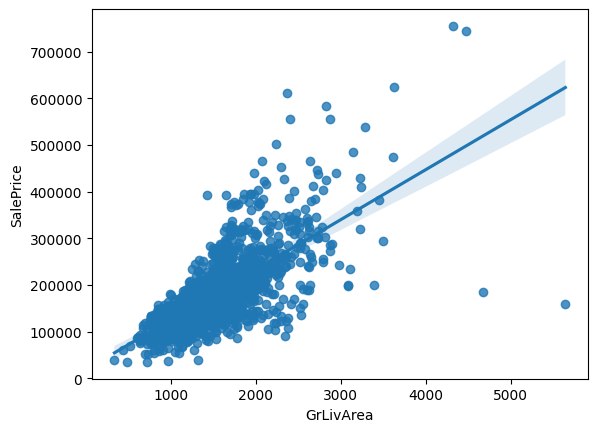

In [110]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.show()


**Preprocessing**

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = train.drop(["Id", "SalePrice"], axis=1)
y = train["SalePrice"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


**Define Models and Hyperparameter Grids**

In [112]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

param_grids = {
    "Ridge Regression": {'alpha': np.logspace(-3, 3, 50)},
    "Random Forest": {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0]
    }
}


**Train, Tune, and Evaluate Models**

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

results = []

for name, model in models.items():
    print(f"=== {name} ===")
    if name in param_grids:
        # Use RandomizedSearchCV for hyperparameter tuning
        search = RandomizedSearchCV(
            model,
            param_distributions=param_grids[name],
            n_iter=20,
            scoring='neg_root_mean_squared_error',
            cv=5,
            random_state=42,
            n_jobs=-1
        )
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        rmse = -search.best_score_
        print(f"Best Params: {search.best_params_}")
        print(f"CV RMSE: {rmse:.4f}")
    else:
        # Train model directly (no hyperparameters)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
        best_model = model
        print(f"Validation RMSE: {rmse:.4f}")
    
    # Evaluate on validation set
    y_pred_valid = best_model.predict(X_valid)
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
    val_r2 = r2_score(y_valid, y_pred_valid)
    
    results.append([name, val_rmse, val_r2])

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Validation RMSE", "Validation R²"])
print("\nFinal Model Comparison:")
print(results_df)


=== Linear Regression ===
Validation RMSE: 219724448602769.2500
=== Ridge Regression ===
Best Params: {'alpha': 8.286427728546842}
CV RMSE: 32994.3227
=== Random Forest ===


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
CV RMSE: 30839.8141
=== Gradient Boosting ===
Best Params: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}
CV RMSE: 27927.0243

Final Model Comparison:
               Model  Validation RMSE  Validation R²
0  Linear Regression     2.197244e+14  -6.294235e+18
1   Ridge Regression     3.054414e+04   8.783696e-01
2      Random Forest     3.268993e+04   8.606798e-01
3  Gradient Boosting     2.661748e+04   9.076323e-01


**Model Selection**

In [114]:
# Sort by RMSE ascending (lower is better)
best_model_row = results_df.sort_values(by="Validation RMSE").iloc[0]
print("Best Model:", best_model_row["Model"])
print("RMSE:", best_model_row["Validation RMSE"])
print("R²:", best_model_row["Validation R²"])



Best Model: Gradient Boosting
RMSE: 26617.480824443206
R²: 0.9076323136327965


**Predict on Validation Set**

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model directly
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

# Predict on validation set
y_pred_valid = gb.predict(X_valid)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2 = r2_score(y_valid, y_pred_valid)

print("Gradient Boosting Validation RMSE:", rmse)
print("Gradient Boosting Validation R²:", r2)


Gradient Boosting Validation RMSE: 27260.029777982836
Gradient Boosting Validation R²: 0.9031189543411837


**Predict on Test Set**

In [125]:
import pandas as pd

# 1. Load test set
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
X_test = test.drop("Id", axis=1)

# 2. One-hot encode categorical columns (same as training)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# 3. Align columns with training set
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# 4. Fill missing values (numerical) using training medians
numerical_cols = X.select_dtypes(exclude=["object"]).columns
for col in numerical_cols:
    if X_test[col].isnull().sum() > 0:
        X_test[col] = X_test[col].fillna(X[col].median())  # assign back instead of inplace

# 5. Predict using trained Gradient Boosting model
y_test_pred = gb.predict(X_test)

# 6. Save submission CSV
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred
})

submission.to_csv("/kaggle/working/house_price_predictions.csv", index=False)
print("Submission file saved successfully!")


Submission file saved successfully!
